## **IBM Stock**

## Importing and installing libraries

In [ ]:
%matplotlib inline
import pandas as pd
#!pip install mplfinance
import mplfinance as mpf
import numpy as np

In [ ]:
#installing yfinance
!pip install yfinance
#importing dataset
import yfinance as yf
#reading the data
ibm_data = yf.download("IBM", start="2015-01-01", end="2021-12-31")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[*********************100%***********************]  1 of 1 completed


### About data

In [ ]:
ibm_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02 00:00:00-05:00,154.216064,156.128113,153.919693,154.933075,110.782326,5779673
2015-01-05 00:00:00-05:00,154.177826,154.177826,152.189301,152.495224,109.039162,5104898
2015-01-06 00:00:00-05:00,152.648178,152.925430,148.346085,149.206497,106.687622,6429448
2015-01-07 00:00:00-05:00,150.286804,150.286804,147.256210,148.231354,105.990318,4918083
2015-01-08 00:00:00-05:00,149.369019,152.045883,148.709366,151.453156,108.294060,4431693
...,...,...,...,...,...,...
2021-12-23 00:00:00-05:00,130.000000,130.960007,129.520004,130.630005,125.941460,3649000
2021-12-27 00:00:00-05:00,130.630005,131.649994,129.949997,131.619995,126.895920,4293900
2021-12-28 00:00:00-05:00,131.600006,133.220001,131.589996,132.630005,127.869675,3445200


* Closing price merely refers to the cost of shares at the end of the day, the adjusted closing price considers other factors like dividends, stock splits, and new stock offerings. Adjusted close price with closing price ends.

In [ ]:
print(f'Dataframe contains stock prices between {ibm_data.index.min()} {ibm_data.index.max()}')
print(f'Total Days={(ibm_data.index.max()-ibm_data.index.min()).days} days')

Dataframe contains stock prices between 2015-01-02 00:00:00-05:00 2021-12-30 00:00:00-05:00
Total Days=2554 days


In [ ]:
ibm_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2015-01-02 00:00:00-05:00 to 2021-12-30 00:00:00-05:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1762 non-null   float64
 1   High       1762 non-null   float64
 2   Low        1762 non-null   float64
 3   Close      1762 non-null   float64
 4   Adj Close  1762 non-null   float64
 5   Volume     1762 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 96.4 KB


* All the features are in integers format.

In [ ]:
ibm_data.index

DatetimeIndex(['2015-01-02 00:00:00-05:00', '2015-01-05 00:00:00-05:00',
               '2015-01-06 00:00:00-05:00', '2015-01-07 00:00:00-05:00',
               '2015-01-08 00:00:00-05:00', '2015-01-09 00:00:00-05:00',
               '2015-01-12 00:00:00-05:00', '2015-01-13 00:00:00-05:00',
               '2015-01-14 00:00:00-05:00', '2015-01-15 00:00:00-05:00',
               ...
               '2021-12-16 00:00:00-05:00', '2021-12-17 00:00:00-05:00',
               '2021-12-20 00:00:00-05:00', '2021-12-21 00:00:00-05:00',
               '2021-12-22 00:00:00-05:00', '2021-12-23 00:00:00-05:00',
               '2021-12-27 00:00:00-05:00', '2021-12-28 00:00:00-05:00',
               '2021-12-29 00:00:00-05:00', '2021-12-30 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=1762, freq=None)

* We can see that date is the index

In [ ]:
ibm_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,137.061695,138.134445,135.983931,137.058281,112.199907,4.899188e+06
std,14.925635,14.786556,15.033781,14.916494,9.642688,2.925637e+06
min,90.439774,93.441681,86.577438,90.602295,79.847000,1.247878e+06
25%,127.442638,128.415386,126.326483,127.335085,107.083138,3.311218e+06
50%,137.318359,138.283936,136.276291,137.294456,112.194012,4.160988e+06
75%,147.265770,148.114246,146.309753,147.222759,117.362789,5.456119e+06
max,173.996170,174.751434,172.963669,173.948380,136.033951,3.981442e+07


* Here we can see that the min of closing price is 79.8 and max is 136


## Data Cleaning

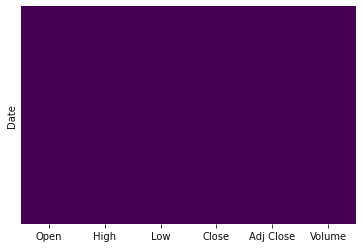

In [ ]:
import seaborn as sns
sns.heatmap(ibm_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
ibm_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

* There are no null values

## Visualization

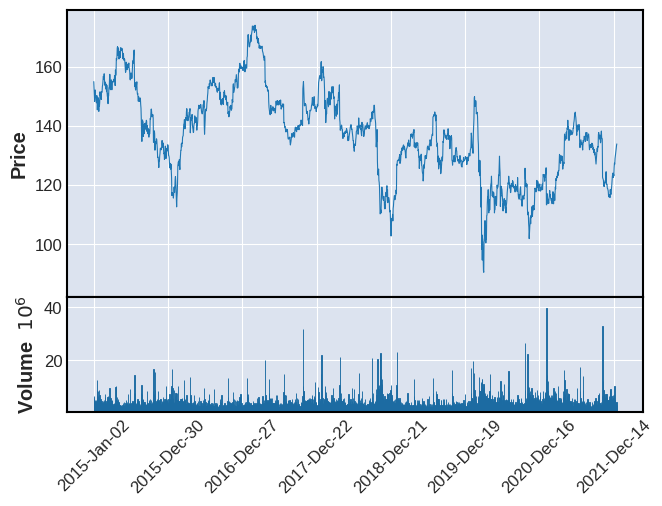

In [ ]:
mpf.plot(ibm_data,type='line',volume=True)

/usr/local/lib/python3.7/dist-packages/mplfinance/_arg_validators.py:46: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


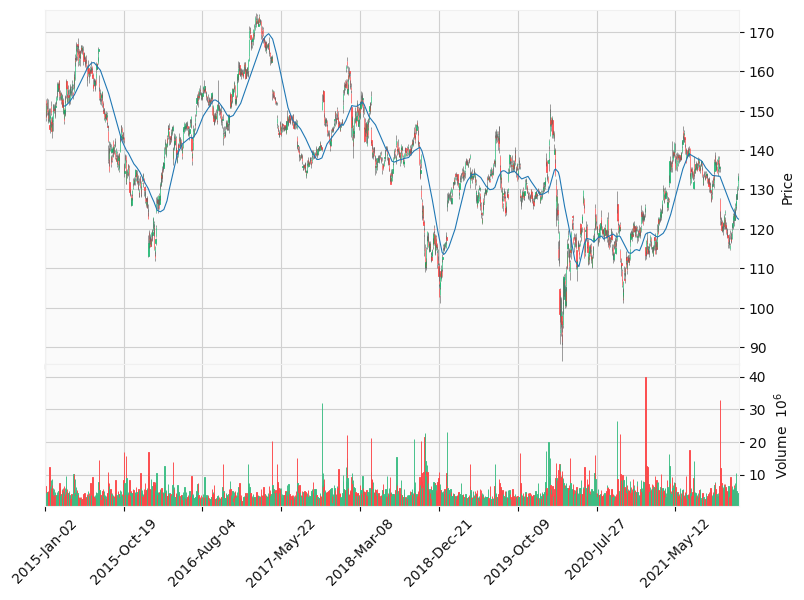

In [ ]:
mpf.plot(ibm_data,type='candle',style='yahoo',mav=(50),volume=True,tight_layout=True)

* The above graph is with moving average of 50

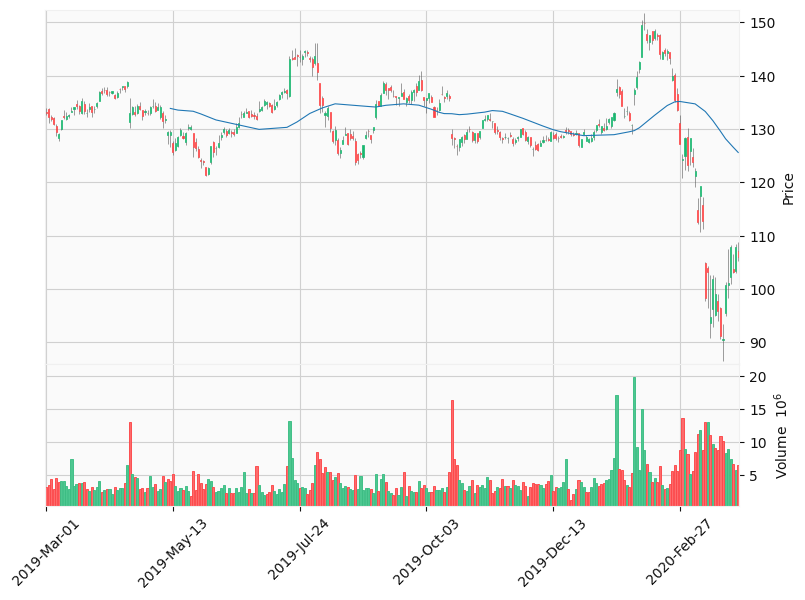

In [ ]:
mpf.plot(ibm_data['2019-03':'2020-03'],type='candle',style='yahoo',mav=(50),volume=True,tight_layout=True)

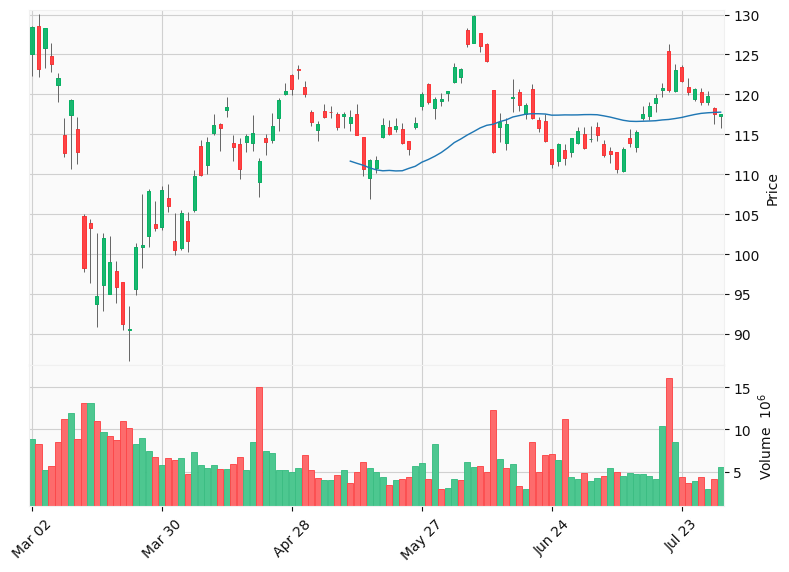

In [ ]:
mpf.plot(ibm_data['2020-03':'2020-07'],type='candle',style='yahoo',mav=(50),volume=True,tight_layout=True)

* As we can see there is sudden drop in 2020 march which might be due to covid
* 2015 might be caused due to the strategic acquisitions and partnerships that IBM (IBM) undertook to revive positive sentiment. However, the company’s recent fiscal 3Q15 results marked its 14th straight quarter of falling revenue. As a result, IBM’s stock fell significantly in 2015.
* The divestiture of IBM’s Intel-based (INTC) x86 server to Lenovo (LNVGY) also contributed to its falling revenues in 2015.

## Model building (Strategy-1)

In [ ]:
x=ibm_data.copy()
x.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02 00:00:00-05:00,154.216064,156.128113,153.919693,154.933075,110.782326,5779673
2015-01-05 00:00:00-05:00,154.177826,154.177826,152.189301,152.495224,109.039162,5104898
2015-01-06 00:00:00-05:00,152.648178,152.925430,148.346085,149.206497,106.687622,6429448
2015-01-07 00:00:00-05:00,150.286804,150.286804,147.256210,148.231354,105.990318,4918083
2015-01-08 00:00:00-05:00,149.369019,152.045883,148.709366,151.453156,108.294060,4431693


In [ ]:
y = np.where(ibm_data['Adj Close'].shift(-1) > ibm_data['Adj Close'], 1, -1)
y

array([-1, -1, -1, ...,  1,  1, -1])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)
#import standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#fit and transform the training data
x_train = scaler.fit_transform(x_train)
#transform the test data
x_test = scaler.transform(x_test)

In [ ]:
#importing libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
#instantiate the models
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svc = SVC()
xgb = XGBClassifier()
#fit the models
knn.fit(x_train, y_train)
rf.fit(x_train, y_train)
gb.fit(x_train, y_train)
svc.fit(x_train, y_train)
#test the models and print accuracy of the model
print('KNN accuracy: ', knn.score(x_test, y_test))
print('Random Forest accuracy: ', rf.score(x_test, y_test))
print('Gradient Boosting accuracy: ', gb.score(x_test, y_test))
print('Support Vector Machine accuracy: ', svc.score(x_test, y_test))

KNN accuracy:  0.5750708215297451
Random Forest accuracy:  0.5410764872521246
Gradient Boosting accuracy:  0.5524079320113314
Support Vector Machine accuracy:  0.5382436260623229


In [ ]:
xgb.fit(x_train, np.where(y_train==-1, 0, 1))
print('XGBoost accuracy: ', xgb.score(x_test, np.where(y_test==-1, 0, 1)))

XGBoost accuracy:  0.56657223796034


* Among all KNN gave highest accuracy before tuning

## Tuning stratergy 1

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
metrics = ['manhattan']
neighbors = np.arange(1, 16)
param_grid  = dict(metric=metrics, n_neighbors=neighbors)
param_grid
knn = KNeighborsClassifier()
# when refit=True, it will fits the best hyperparameters to all training data
# and also allow to use GridSearchCV object as an estimator for prediction
grid= GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', refit=True)
grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
             scoring='accuracy')

In [ ]:
print('KNN accuracy: ', grid.score(x_test, y_test))
print(grid.best_params_)
print(grid.best_estimator_)

KNN accuracy:  0.5580736543909348
{'metric': 'manhattan', 'n_neighbors': 6}
KNeighborsClassifier(metric='manhattan', n_neighbors=6)


In [ ]:
from sklearn.model_selection import GridSearchCV
#set the parameters to be tuned
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
#instantiate the grid search
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
#fit the grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.496 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.518 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.518 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.511 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.520 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.528 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.518 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.507 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.507 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.520 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.518 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
print('Support Vector Machine accuracy: ', grid.score(x_test, y_test))
print(grid.best_params_)
print(grid.best_estimator_)


Support Vector Machine accuracy:  0.5524079320113314
{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)


In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
# 'min_child_weight' : [ 1, 3 ],
# 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ],
random_params_xgb={
'learning_rate' : [0.1,  0.2,  0.3],
'max_depth' : [ 6,10,15,20],
# 'n_estimators' : [100,200,400, 600, 700, 900],
}
#using randomized search cv as the gridsearchcv takes too long.
random_search = RandomizedSearchCV(xgb, random_params_xgb, scoring='recall',cv = 5, n_jobs = -1, verbose = 1)
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3],
                                        'max_depth': [6, 10, 15, 20]},
                   scoring='recall', verbose=1)

In [ ]:
xgb_model=random_search.best_estimator_
xgb_model.fit(x_train, y_train)
predXGB = xgb_model.predict(x_test)

In [ ]:
xgb_model.score(x_test,y_test)

0.5410764872521246

Statergy 2

In [ ]:
y= np.where(x['Adj Close'].rolling(50).mean() > x['Adj Close'].rolling(200).mean(), 1, 0)
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
np.unique(y)

array([0, 1])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)
#fit and transform the training data
x_train = scaler.fit_transform(x_train)
#transform the test data
x_test = scaler.transform(x_test)
#fit the models
knn.fit(x_train, y_train)
rf.fit(x_train, y_train)
gb.fit(x_train, y_train)
svc.fit(x_train, y_train)
xgb.fit(x_train, y_train)
#test the models and print accuracy of the model
print('KNN accuracy: ', knn.score(x_test, y_test))
print('Random Forest accuracy: ', rf.score(x_test, y_test))
print('Gradient Boosting accuracy: ', gb.score(x_test, y_test))
print('Support Vector Machine accuracy: ', svc.score(x_test, y_test))
print('XGBoost accuracy: ', xgb.score(x_test, y_test))


KNN accuracy:  0.8583569405099151
Random Forest accuracy:  0.8413597733711048
Gradient Boosting accuracy:  0.773371104815864
Support Vector Machine accuracy:  0.7422096317280453
XGBoost accuracy:  0.7762039660056658


## Tuning statergy2

In [ ]:
param_grid = {'learning_rate': [0.01, 0.1, 0.2, 0.3], 'max_depth': [3, 4, 5, 6,7], 'n_estimators': [100, 200, 300, 400, 500]}
#instantiate the grid search
grid = GridSearchCV(XGBClassifier(), param_grid, refit=True, verbose=3)
#fit the grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.720 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.759 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.759 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.809 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.808 total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.745 total time=   0.2s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.766 total time=   0.2s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.787 total time=   0.2s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.805 total time=   0.2s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.

GridSearchCV(estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=3)

In [ ]:
print('XGBoost accuracy: ', grid.score(x_test, y_test))
#print the best parameters
print(grid.best_params_)
print(grid.best_estimator_)

XGBoost accuracy:  0.830028328611898
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
XGBClassifier(max_depth=5, n_estimators=200)
